In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
df = pd.read_csv('bank-full.csv', sep=';')

In [67]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [68]:
cols = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]


In [69]:
df = df[cols]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
contact,0
day,0
month,0
duration,0


#Q.1

In [71]:
df.education.mode()

,education
0,secondary


## Ans.  secondary

# Q.2

In [72]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
contact,object
day,int64
month,object
duration,int64


In [73]:
numerical = df.select_dtypes(include=np.number)
numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


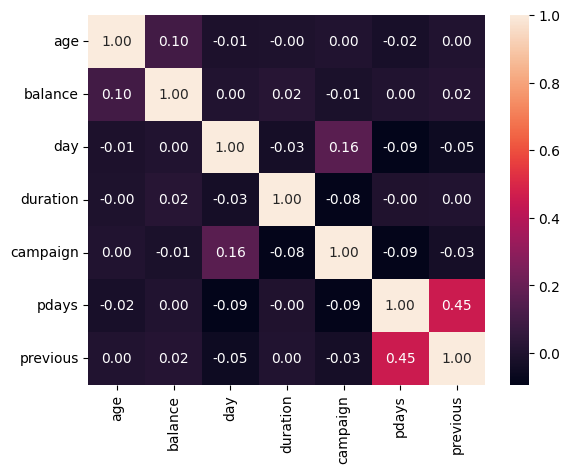

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [74]:
corrMatrix = numerical.corr()
sns.heatmap(corrMatrix, annot=True, fmt=".2f")
plt.show()
plt.figure(figsize=(20,20))

## Ans. pdays and previous

### Encode y variable as 1 or 0

In [75]:
df.y = df.y.map({'yes':1, 'no':0})

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=42)
print(len(df_train), len(df_val), len(df_test))

27126 9043 9042


In [78]:
df_train = df_train.reset_index(drop='True')
df_val = df_val.reset_index(drop='True')
df_test = df_test.reset_index(drop='True')

target = 'y'
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [79]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

# Q.3

In [80]:
from sklearn.metrics import mutual_info_score

In [81]:
def get_mi_score(category):
    return mutual_info_score(df_train['y'], df_train[category])

In [82]:
mi_scores = []
for c in categorical:
    mi_scores.append({'category': c, 'score': get_mi_score(c)})
mi_scores_df = pd.DataFrame(mi_scores)
mi_scores_df.sort_values(by='score', ascending=False)

,category,score
6,poutcome,0.029533
5,month,0.025090
4,contact,0.013356
3,housing,0.010343
0,job,0.007316
2,education,0.002697
1,marital,0.002050


## Ans. poutcome

# Q.4

In [83]:
del df_train[target]
del df_val[target]
del df_test[target]

In [84]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [85]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [87]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [88]:
y_pred = model.predict(X_val)


In [105]:
from sklearn.metrics import accuracy_score
accuracy_score_val = accuracy_score(y_val, y_pred)
print(f'The accuracy score is {accuracy_score_val}')

The accuracy score is 0.8984850160345018


# Q.5

In [106]:
features = ['age','balance','marital','previous', 'y']
df5 = df[features]
df5.head()


,age,balance,marital,previous,y
0,58,2143,married,0,0
1,44,29,single,0,0
2,33,2,married,0,0
3,47,1506,married,0,0
4,33,1,single,0,0


In [114]:
def train(df, feature):
  df = df.copy()
  df = df.drop(feature, axis=1)
  df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
  df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=42)
  print(len(df_train), len(df_val), len(df_test))

  df_train = df_train.reset_index(drop='True')
  df_val = df_val.reset_index(drop='True')
  df_test = df_test.reset_index(drop='True')

  target = 'y'
  if target in df_train.columns:
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(f'The accuracy score is {score}')
    return score
  else:
    print("Target column not found in DataFrame.")
    return None


In [115]:
scores = []
for feature in features:
  feature_score = train(df5, feature)
  scores.append({'feature': feature, "accuracy": feature_score})
scores_df = pd.DataFrame(scores)
scores_df.sort_values(by='accuracy', ascending=True)

27126 9043 9042
The accuracy score is 0.8769213756496738
27126 9043 9042
The accuracy score is 0.8776954550481035
27126 9043 9042
The accuracy score is 0.8772531239632865
27126 9043 9042
The accuracy score is 0.8790224483025545
27126 9043 9042
Target column not found in DataFrame.


,feature,accuracy
0,age,0.876921
2,marital,0.877253
1,balance,0.877695
3,previous,0.879022
4,y,NaN


In [116]:
def train_original_df(df):
  df = df.copy()
  df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
  df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=42)
  print(len(df_train), len(df_val), len(df_test))

  df_train = df_train.reset_index(drop='True')
  df_val = df_val.reset_index(drop='True')
  df_test = df_test.reset_index(drop='True')

  target = 'y'
  if target in df_train.columns:
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(f'The accuracy score is {score}')
    return score
  else:
    print("Target column not found in DataFrame.")
    return None


In [117]:
base_score = train_original_df(df5)
base_score

27126 9043 9042
The accuracy score is 0.8771425411920822


0.8771425411920822

In [118]:
scores_df['diff'] = scores_df['accuracy'] - base_score
scores_df.sort_values(by='diff', ascending=True)
scores_df

,feature,accuracy,diff
0,age,0.876921,-0.000221
1,balance,0.877695,0.000553
2,marital,0.877253,0.000111
3,previous,0.879022,0.001880
4,y,NaN,NaN


## Ans. age

# Q.6

In [126]:
Cs = [0.01, 0.1, 1, 10, 100]

In [121]:
def train_regularized(df, C):
  df = df.copy()
  df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
  df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=42)
  print(len(df_train), len(df_val), len(df_test))

  df_train = df_train.reset_index(drop='True')
  df_val = df_val.reset_index(drop='True')
  df_test = df_test.reset_index(drop='True')

  target = 'y'
  if target in df_train.columns:
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(f'The accuracy score is {score}')
    return score
  else:
    print("Target column not found in DataFrame.")
    return None


In [130]:
regularized_scores = []
for c in Cs:
  regularized_score = train_regularized(df, c)
  regularized_scores.append({'C': c, "accuracy": regularized_score})
  regularized_scores_df = pd.DataFrame(regularized_scores)
  regularized_scores_df = regularized_scores_df.sort_values(by='accuracy', ascending=False)
regularized_scores_df

27126 9043 9042
The accuracy score is 0.8960521950680084
27126 9043 9042
The accuracy score is 0.898595598805706
27126 9043 9042
The accuracy score is 0.8994802609753401
27126 9043 9042
The accuracy score is 0.8984850160345018
27126 9043 9042
The accuracy score is 0.8987061815769103


,C,accuracy
2,1.00,0.899480
4,100.00,0.898706
1,0.10,0.898596
3,10.00,0.898485
0,0.01,0.896052


## Ans. 1.00